In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', color_codes=True)


rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8

warnings.filterwarnings('ignore')

In [2]:
pain = pd.read_csv('data/pain.csv').drop(columns='Unnamed: 6')
pain.columns = pain.columns.str.replace(' ', '')
pain['date'] = pd.to_datetime(pain['date'] ,dayfirst=True)#.dt.strftime('%d/%m/%Y')
pain = pain.set_index('date')

In [3]:
sports = pd.read_csv('data/sport.csv')
sports.columns = sports.columns.str.replace(' ', '')
sports['date'] = pd.to_datetime(sports['date'],dayfirst=True)
sports['sport'] = sports['sport'].str.strip()
sports = sports.set_index('date')

In [4]:
pain.shape

(99, 5)

## Crossfit

In [5]:
cf = sports.reset_index().groupby(['date','sport']).sum().reset_index()
cf = cf[cf.sport=='CF']

In [6]:
cf.columns = ['date', 'sport', 'total_intensity_CF', 'knee_intensity_CF', 'time']

In [7]:
df = pain.join(cf.set_index('date').knee_intensity_CF)

In [8]:
df.fillna(0,inplace=True)

In [9]:
df['knee_intensity_CF_lag_1'] = df.knee_intensity_CF.shift(1)
df['knee_intensity_CF_lag_2'] = df.knee_intensity_CF.shift(2)
df['knee_intensity_CF_lag_3'] = df.knee_intensity_CF.shift(3)

In [10]:
df.fillna(0,inplace=True)

## Kite

In [11]:
kite = sports.reset_index().groupby(['date','sport']).sum().reset_index()
kite = kite[kite.sport=='Kite']

In [12]:
kite.columns = ['date', 'sport', 'total_intensity_kite', 'knee_intensity_kite', 'time']

In [13]:
df = df.join(kite.set_index('date').knee_intensity_kite)

In [14]:
df.fillna(0,inplace=True)

In [15]:
df['knee_intensity_kite_lag_1'] = df.knee_intensity_kite.shift(1)
df['knee_intensity_kite_lag_2'] = df.knee_intensity_kite.shift(2)
df['knee_intensity_kite_lag_3'] = df.knee_intensity_kite.shift(3)

In [16]:
df.fillna(0,inplace=True)

In [17]:
df

,pain,leg_fatigue,total_fatigue,nsaids,colageno,knee_intensity_CF,knee_intensity_CF_lag_1,knee_intensity_CF_lag_2,knee_intensity_CF_lag_3,knee_intensity_kite,knee_intensity_kite_lag_1,knee_intensity_kite_lag_2,knee_intensity_kite_lag_3
date,,,,,,,,,,,,,
2021-03-27,4.0,2,2,False,False,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-28,7.0,10,10,False,False,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-29,6.0,8,8,False,False,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-03-30,5.0,6,6,False,False,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
2021-03-31,3.0,3,4,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29,3.0,0,0,False,True,2.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0
2021-06-30,1.0,0,0,False,True,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0
2021-07-01,1.0,0,0,False,True,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0


## Others

In [18]:
aux = sports.reset_index().groupby(['date','sport']).sum().reset_index()
aux = aux[(aux.sport != 'CF') & (aux.sport != 'Kite')]

In [19]:
aux.columns = ['date', 'sport', 'total_intensity_other', 'knee_intensity_other', 'time']

In [20]:
df = df.join(aux.set_index('date').knee_intensity_other)

In [21]:
df.fillna(0,inplace=True)

In [22]:
df['knee_intensity_other_lag_1'] = df.knee_intensity_other.shift(1)
df['knee_intensity_other_lag_2'] = df.knee_intensity_other.shift(2)
df['knee_intensity_other_lag_3'] = df.knee_intensity_other.shift(3)

In [23]:
df.fillna(0,inplace=True)

## Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import shap
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [25]:
df = df.reset_index(drop=True)

In [26]:
df.nsaids = df.nsaids.astype(bool)

In [27]:
df.colageno = df.colageno.astype(bool)

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(df.drop(columns='pain'), df[['pain']], test_size=0.1, random_state=42)

### Dummy

In [29]:
mean_absolute_error(np.zeros_like(y_tr) + np.mean(y_tr).values, y_tr)

1.0030821553831437

In [30]:
mean_absolute_error(np.zeros_like(y_te) + np.mean(y_te).values, y_te)

1.3636363636363635

### Lasso

In [31]:
clf = Lasso(alpha=0.1)

In [32]:
clf.fit(X_tr,y_tr)

Lasso(alpha=0.1)

In [33]:
mean_absolute_error(clf.predict(X_tr),y_tr)

0.8059701615005312

In [34]:
mean_absolute_error(clf.predict(X_te),y_te)

1.1319724692669992

In [35]:
print("Model coefficients:\n")
for i in range(X_tr.shape[1]):
    print(X_tr.columns[i], "=", clf.coef_[i].round(4))

Model coefficients:

leg_fatigue = 0.0
total_fatigue = 0.3329
nsaids = 0.0
colageno = 0.0
knee_intensity_CF = 0.0073
knee_intensity_CF_lag_1 = -0.0078
knee_intensity_CF_lag_2 = -0.0
knee_intensity_CF_lag_3 = 0.0181
knee_intensity_kite = -0.0
knee_intensity_kite_lag_1 = -0.0529
knee_intensity_kite_lag_2 = -0.0089
knee_intensity_kite_lag_3 = -0.1752
knee_intensity_other = 0.0
knee_intensity_other_lag_1 = 0.0
knee_intensity_other_lag_2 = 0.043
knee_intensity_other_lag_3 = 0.0


### Decision tree

In [36]:
dt = DecisionTreeRegressor(max_depth=3,criterion='mae')
dt.fit(X_tr,y_tr)

DecisionTreeRegressor(criterion='mae', max_depth=3)

In [37]:
print('Decision Tree Results')

Decision Tree Results


In [38]:
print('Train ',mean_absolute_error(dt.predict(X_tr),y_tr))

Train  0.634020618556701


In [39]:
print('Test ',mean_absolute_error(dt.predict(X_te),y_te))

Test  1.0454545454545454


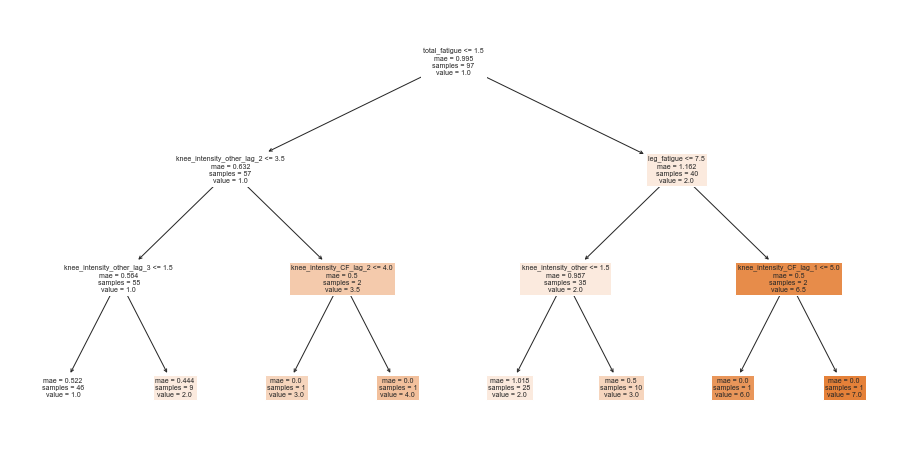

In [40]:
plt.figure()
plot_tree(dt, feature_names=X_te.columns, filled=True);
plt.savefig('images/dt.svg',format='svg')

### Random Forest

In [41]:
rf = RandomForestRegressor(min_samples_leaf=3)
rf.fit(X_tr,y_tr)

RandomForestRegressor(min_samples_leaf=3)

In [42]:
print('RF results')

RF results


In [43]:
print('Train',mean_absolute_error(rf.predict(X_tr),y_tr))

Train 0.5511457543029709


In [44]:
print('Test',mean_absolute_error(rf.predict(X_te),y_te))

Test 1.0080175783812146


### Xgboost

In [45]:
xgb = XGBRFRegressor().fit(X_tr,y_tr)
print('XGB Results')
print('Train ',mean_absolute_error(xgb.predict(X_tr),y_tr))

XGB Results
Train  0.45564318379176033


In [46]:
print('Test ',mean_absolute_error(xgb.predict(X_te),y_te))

Test  1.0870459188114514


# Shift

In [47]:
df['pain_shift'] = df.pain - df.pain.shift()
df = df.dropna().drop(columns = 'pain')
X_tr, X_te, y_tr, y_te = train_test_split(df.drop(columns='pain_shift'), df[['pain_shift']], test_size=0.1, random_state=42)

### Dummy

In [48]:
mean_absolute_error(np.zeros_like(y_tr) + np.mean(y_tr).values, y_tr)

0.7529296875

In [49]:
mean_absolute_error(np.zeros_like(y_te) + np.mean(y_te).values, y_te)

1.1983471074380165

### Lasso

In [50]:
clf = Lasso(alpha=0.1)

In [51]:
clf.fit(X_tr,y_tr)

Lasso(alpha=0.1)

In [52]:
mean_absolute_error(clf.predict(X_tr),y_tr)

0.7600991047587327

In [53]:
mean_absolute_error(clf.predict(X_te),y_te)

1.0393932392572887

In [54]:
print("Model coefficients:\n")
for i in range(X_tr.shape[1]):
    print(X_tr.columns[i], "=", clf.coef_[i].round(4))

Model coefficients:

leg_fatigue = 0.015
total_fatigue = 0.0
nsaids = 0.0
colageno = 0.0
knee_intensity_CF = 0.0826
knee_intensity_CF_lag_1 = 0.0185
knee_intensity_CF_lag_2 = -0.0
knee_intensity_CF_lag_3 = -0.0
knee_intensity_kite = 0.0319
knee_intensity_kite_lag_1 = -0.0
knee_intensity_kite_lag_2 = -0.0431
knee_intensity_kite_lag_3 = -0.0
knee_intensity_other = 0.0
knee_intensity_other_lag_1 = 0.0
knee_intensity_other_lag_2 = 0.0
knee_intensity_other_lag_3 = 0.0


### Decision tree

In [66]:
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf=2,criterion='mae')
dt.fit(X_tr,y_tr)

DecisionTreeRegressor(criterion='mae', max_depth=3, min_samples_leaf=2)

In [67]:
print('Decision Tree Results')

Decision Tree Results


In [68]:
print('Train ',mean_absolute_error(dt.predict(X_tr),y_tr))

Train  0.5989583333333334


In [69]:
print('Test ',mean_absolute_error(dt.predict(X_te),y_te))

Test  1.1363636363636365


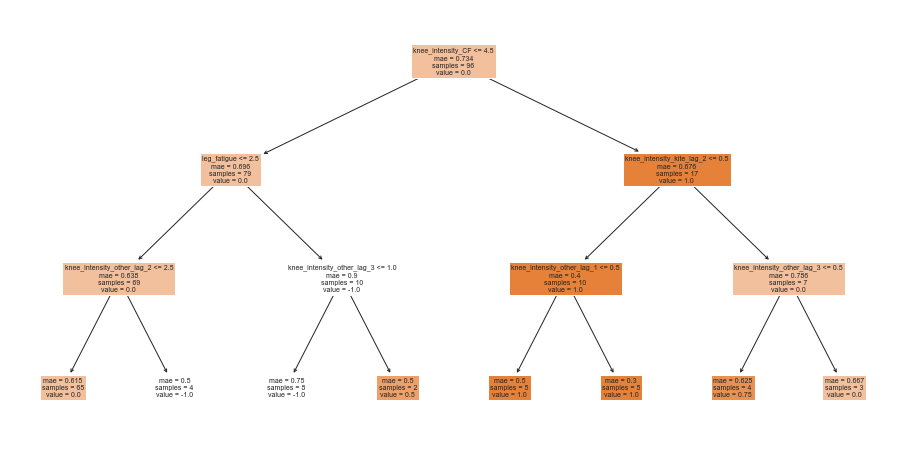

In [71]:
plt.figure()
plot_tree(dt, feature_names=X_te.columns, filled=True);
plt.savefig('images/dt_shift.svg',format='svg')

### Random Forest

In [60]:
rf = RandomForestRegressor(min_samples_leaf=3)
rf.fit(X_tr,y_tr)

RandomForestRegressor(min_samples_leaf=3)

In [61]:
print('RF results')

RF results


In [62]:
print('Train',mean_absolute_error(rf.predict(X_tr),y_tr))

Train 0.49872118679931177


In [63]:
print('Test',mean_absolute_error(rf.predict(X_te),y_te))

Test 1.0887479187479185


### Xgboost

In [64]:
xgb = XGBRFRegressor().fit(X_tr,y_tr)
print('XGB Results')
print('Train ',mean_absolute_error(xgb.predict(X_tr),y_tr))

XGB Results
Train  0.4362940756376095


In [65]:
print('Test ',mean_absolute_error(xgb.predict(X_te),y_te))

Test  1.099412294443358
